<a href="https://colab.research.google.com/github/andreacohen7/food-sales-predictions/blob/main/Food_Sales_Predictions_Visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Food Sales Predictions
- Andrea Cohen
- 12.08.22

## Task:  
To help the retailer understand the properties of products and outlets that play crucial roles in increasing sales.

## Loading Data

In [1]:
#mount the drive
from google.colab import drive
drive.mount ('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
#import libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [3]:
#load the dataset
filename = '/content/sales_predictions.csv'
df = pd.read_csv(filename)
display(df.head())
display(df.info())

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


None

##Data Cleaning

In [4]:
#how many rows and columns?
df.shape

(8523, 12)

> There are 8523 rows and 12 columns.

In [5]:
#what are the datatypes of each variable?
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

> Item_Identifier, Item_Fat_Content, Item_Type, Outlet_Identifier, Outlet_Size, Outlet_Location_Type, and Outlet_Type are all datatype object.  
Item_Weight, Item_Visibility, Item_MRP, and Item_Outlet Sales are all datatype float.
Item_Establishment_Year is datatype int.


In [6]:
#are there any duplicates? if so drop any duplicates
display(df.duplicated())
df.duplicated().sum()

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Length: 8523, dtype: bool

0

> There are 0 duplicates.

In [7]:
#identify missing values
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

> There are 1463 missing values in Item_Weight, and there are 2410 missing values in Outlet_Size.

In [8]:
#decide on how to address the missing values and do it
display(df['Item_Weight'].nunique())
mean_weight = df['Item_Weight'].mean().round(2)
df['Item_Weight'].fillna(mean_weight, inplace=True)
display(df.isna().sum())

415

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

> For the Column 'Item_Weight':  
Dropping rows was not a good option because 17% of rows are missing data--too many (>2%) to just eliminate.  
Dropping columns was not a good option because the weight of the item might be an important property for predicting the sales of that item.  Also, <50% of the data are missing, too little to just eliminate.  
Creating a new category was not a good option because the data are type float instead of type object.  
Imputing missing values is a great option because the average (mean) value would likely be closest to the correct value that is missing.

In [9]:
display(df['Outlet_Size'].nunique())
display(df['Outlet_Size'].value_counts())
df['Outlet_Size'].fillna('Missing', inplace=True)
display(df['Outlet_Size'].value_counts())
display(df.isna().sum())

3

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

Medium     2793
Missing    2410
Small      2388
High        932
Name: Outlet_Size, dtype: int64

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

> For the column 'Outlet_Size':  
Dropping rows was not a good option because 28% of rows are missing data--too many (>2%) to just eliminate.  
Dropping columns was not a good option because the size of the outlet might be an important property for predicting sales.  Also, <50% of the data are missing, too little to just eliminate.  
Imputing missing values was not a good option because the data are type object instead of type float or int.  
Creating a new category is a good option because the information is categorical, and there might be a pattern to the missing data.

In [10]:
#confirm that there are no missing values
display(df.isna().sum())

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [11]:
#find and fix any inconsistent categories of data
#from the data dictionary, we know that Item_Fat_Content, Item_Type, Outlet_Size, Outlet_Location_Type, and Outlet_Type should be categorical data types
dtypes = df.dtypes
str_cols = dtypes[dtypes=='object'].index
for col in str_cols:
  print(f'Column= {col}')
  print(df[col].value_counts())
  print(' ')
#There are inconsistencies in the Item_Fat_Content column
#Low Fat, LF, and low fat are probably the same category
#Regular, reg are probably the same category
df['Item_Fat_Content'].replace({'LF': 'Low Fat', 'low fat': 'Low Fat', 'reg': 'Regular'}, inplace=True)
print('Column = Item_Fat_Content')
display(df['Item_Fat_Content'].value_counts())

Column= Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64
 
Column= Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64
 
Column= Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64
 
Column= Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018  

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

> From the data dictionary, we know that Item_Fat_Content, Item_Type, Outlet_Size, Outlet_Location Type, and Outlet_Type should be categorical data types.  
For Item_Fat_Content, Low Fat, LF, and low fat are all probably the same category.  
Also Regular and reg are probably the same category.  
For the rest of the categorical columns, all data categories appear distinct.

In [12]:
#for any numerical columns obtain the summary statistics of each (min, max, mean)
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.858049,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.860000,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


> The min item weight is 4.56, the max item weight is 21.35, and the mean item weight is 12.86.  
The min item visibility is 0.00, the max item visibility is .33, and the mean item visibility is .07.  
The min item MRP is 31.29, the max item MRP is 266.89, and the mean item MRP is 140.99.  
The min outlet establishment year is 1985, the max outlet establishment year is 2009, and the mean outlet establishment year is 1997.83.  
The min item outlet sales is 33.29, the max item outlet sales is 13086.96, and the mean item outlet sales is 2181.29.

## Exploratory Visuals
> Histogram to view the distributions of various features in your dataset

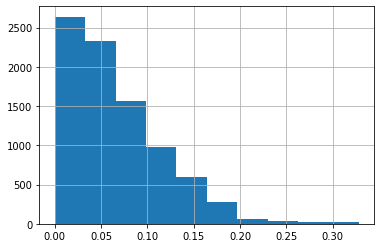

In [13]:
df['Item_Visibility'].hist();

- The item visibility has a right-skewed distribution, with the most frequent observations at lower values--most of the items in the store have a low visibility.

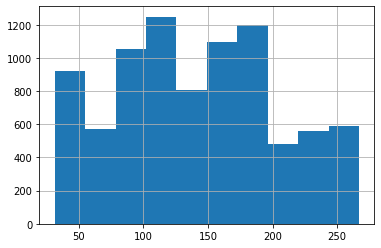

In [14]:
df['Item_MRP'].hist();

- There is no particular pattern of frequency distribution for the maximum price of an item.

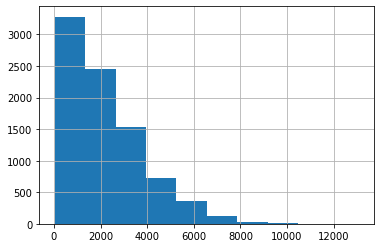

In [15]:
df['Item_Outlet_Sales'].hist();

- The sales data is right-skewed, with more frequent observations at lower values--most of the stores have low sales.

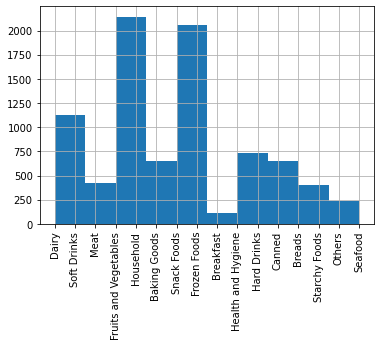

In [16]:
df['Item_Type'].hist();
plt.xticks(rotation = 90);

- Most of the data points correspond to household and frozen foods.

> Boxplot to view statistical summaries of various features in your dataset.

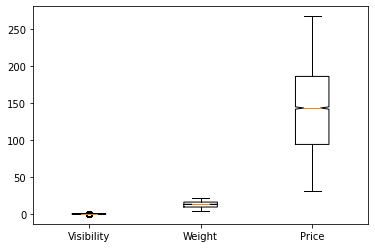

In [17]:
visibility = df['Item_Visibility'].values
weight = df['Item_Weight'].values
price = df['Item_MRP'].values
sales = df['Item_Outlet_Sales'].values
fig, axes = plt.subplots(nrows = 1, ncols = 1)
axes.boxplot([visibility, weight, price], notch = True, labels = ['Visibility', 'Weight', 'Price']);

- The range of values for price is significantly larger than the range of values for visibility and for weight.

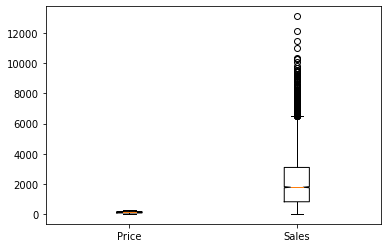

In [18]:
fig, axes = plt.subplots(nrows = 1, ncols = 1)
axes.boxplot([price, sales], notch = True, labels = ['Price', 'Sales']);

- The range of values for sales is significantly larger than the range of values for price.

> Heatmap of the correlation between features.

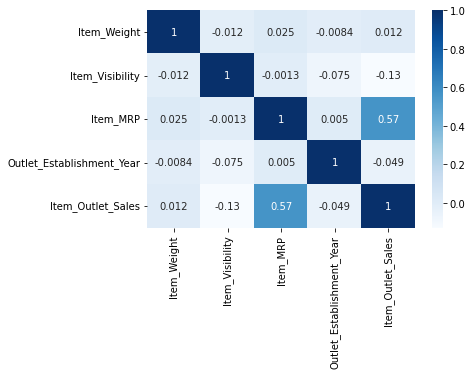

In [19]:
corr = df.corr()
sns.heatmap(corr, cmap = 'Blues', annot = True);

- Most of the correlation coefficients show no correlation, except that there is a moderate correlation between the maximum price of an item and the sales of that item.  

## Explanatory Visuals

### Task:  
To help your stakeholders better understand trends in the data.

> Do higher prices increase the overall sales at the outlet?

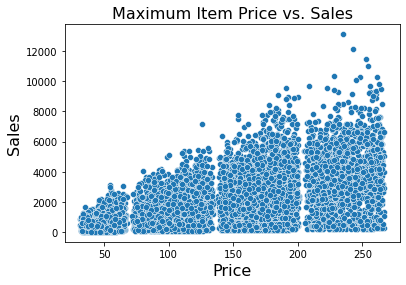

In [20]:
ax = sns.scatterplot(data = df, x = 'Item_MRP', y = 'Item_Outlet_Sales')
plt.xlabel('Price', fontsize=16)
plt.ylabel('Sales', fontsize=16)
plt.title('Maximum Item Price vs. Sales', fontsize=16);

  - Interpretation:  
  This scatterplot shows a positive correlation between the maximum price of an item and the overall outlet sales.  Outlets with higher maximum prices tend to have higher overall sales.  However, we can't assume that higher prices cause higher sales, just because they are correlated.

> Does the outlet size, the outlet location, or the the outlet type affect the sales?

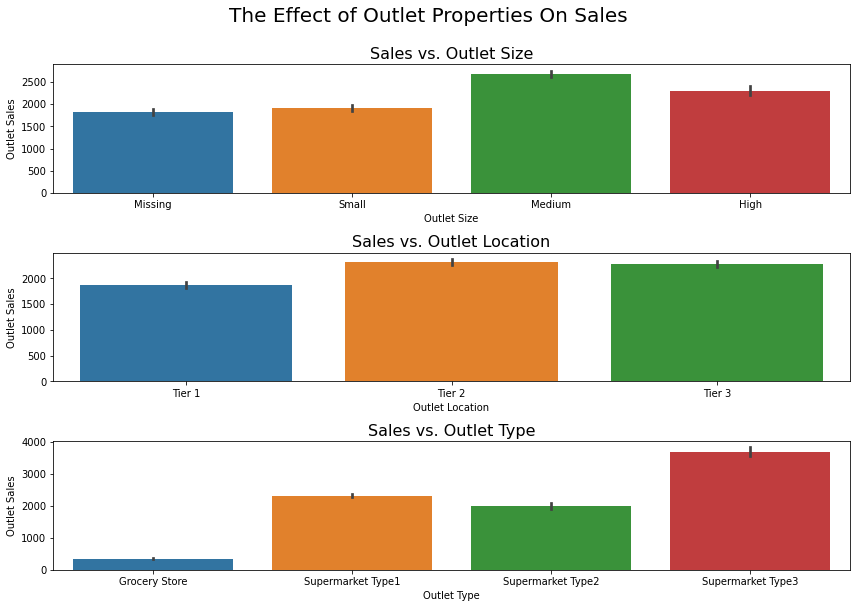

In [21]:
df2 = df.rename(columns={'Outlet_Size':'Outlet Size',
                                'Outlet_Location_Type':'Outlet Location',
                                'Outlet_Type':'Outlet Type',
                                'Item_Outlet_Sales':'Outlet Sales'})
label_order_list = ['Missing', 'Small', 'Medium', 'High']
label_order_list2 = ['Tier 1', 'Tier 2', 'Tier 3']
label_order_list3 = ['Grocery Store', 'Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3']
fig, axes = plt.subplots(nrows = 3, figsize = (12, 8));
sns.barplot(data = df2, x = 'Outlet Size', y = 'Outlet Sales', order = label_order_list, ax = axes[0]);
axes[0].set_title('Sales vs. Outlet Size', fontsize = 16);
sns.barplot(data = df2, x = 'Outlet Location', y = 'Outlet Sales', order = label_order_list2, ax = axes[1]);
axes[1].set_title('Sales vs. Outlet Location', fontsize = 16);
sns.barplot(data = df2, x = 'Outlet Type', y = 'Outlet Sales', order = label_order_list3, ax = axes[2]);
axes[2].set_title('Sales vs. Outlet Type', fontsize = 16);
fig.suptitle('The Effect of Outlet Properties On Sales', fontsize = 20, y = 1.05);
fig.tight_layout();

  - Interpretation:  
  The outlet properties make a difference in overall sales.  First, medium-sized stores have the highest sales, and small-sized stores have the lowest sales.  Second, tier 2 and 3 locations also have the highest sales.  Finally, supermarkets have higher sales than grocery stores.  This might indicate that medium and large stores, tier 2 and 3 stores, and supermarkets use more effective sales strategies.  


> Does the display of the item (item visibility) affect the sales?

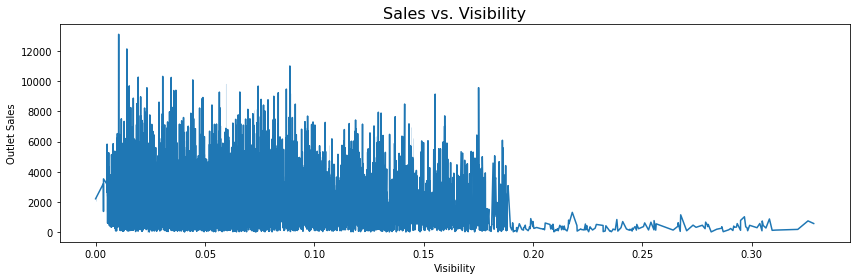

In [22]:
df3 = df.rename(columns={'Item_Visibility':'Visibility',
                         'Item_Outlet_Sales':'Outlet Sales'})
fig, axes = plt.subplots(figsize = (12, 4));
sns.lineplot(data = df3, x = 'Visibility', y = 'Outlet Sales');
plt.title('Sales vs. Visibility', fontsize = 16);
fig.tight_layout();

  - Interpretation:  
  The visibility of an item makes a difference in overall sales.  Items with lower visibility scores have higher sales--this might indicate that lower visibility scores increase sales.

> Recommendations:
The retailer should increase use of the effective sales strategies (including item visibility and maximum item price) used by medium and large stores, tier 2 and 3 stores, and supermarkets.  The retailer should also recognize the room for further growth in small stores, tier 1 locations, and grocery stores--they might need to use different sales strategies in these outlets than in medium and large stores/tier 2 and 3 stores/supermarkets.